##Bring in libraries and dataframes and set indexes

In [93]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [115]:
#Read in data calibrated VWC data
Data = pd.read_pickle('.\DataFrames\LysoDrainage_df')


In [117]:
ManualData.transpose()

Date,2014-11-19 00:00:00,2014-12-23 00:00:00,2015-01-15 00:00:00,2015-01-22 00:00:00,2015-01-27 00:00:00,2015-02-27 00:00:00,2015-03-09 00:00:00,2015-03-12 00:00:00,2015-03-23 00:00:00,2015-04-07 00:00:00,...,2015-06-22 00:00:00,2015-06-29 13:30:00,13/07/2015 13:30:00 a.m.,21/07/2015 13:30:00 a.m.,2015-08-06 11:00:00,10/08/2015 13:45:00 a.m.,2015-08-18 09:00:00,2015-09-15 11:30:00,21/09/2015 14:00:00 a.m.,2015-10-13 09:45:00
1 F,0,0,1100,900,1070,3300,1000,6100,1550,1320,...,7440,2918,2906,1940.9,399.5,1582.4,2230.1,881.9,3507.0,3036.33
2 D,0,0,0,0,0,0,0,4950,1150,870,...,5860,3027,2265,1447.5,294.6,0.0,1703.3,298.3,239.8,929.29
3 E,0,0,0,0,0,1050,150,8000,1750,960,...,6500,3098,2495,1573.9,309.0,589.4,2189.5,269.7,2157.1,2163.44
4 C,0,300,1210,550,1300,4100,1000,8000,1750,770,...,7080,2949,2764,1773.4,490.7,1317.8,2179.4,742.8,3110.3,1817.72
5 B,0,0,1350,600,1000,1600,450,8000,1340,190,...,6300,2886,2485,1601.7,365.9,824.8,1967.1,389.4,2297.7,992.55
6 A,0,0,0,0,0,0,0,4300,1100,600,...,5500,2919,2108,1365.1,540.7,0.0,1326.3,568.4,597.3,399.04
7 D,0,0,0,0,0,0,0,7000,1250,1380,...,6090,3023,2265,1471.6,236.6,0.0,1831.8,280.7,605.9,693.36
8 B,0,0,150,350,750,1000,400,8000,1350,450,...,6710,3062,2767,1685.3,446.9,778.7,2134.8,391.4,2103.8,900.03
9 F,0,0,720,1450,1450,3650,1250,8000,1760,1370,...,7180,3011,2884,1851.1,505.1,1519.9,2369.5,906.3,3509.8,1703.30
10 A,0,0,0,0,0,0,0,4700,770,1050,...,5520,2773,1944,1179.4,401.4,0.0,1084.4,371.6,412.7,46.51


## Set time slice to graph

In [95]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max()  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 100
#Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
EndDate

Timestamp('2016-03-29 10:15:00')

In [96]:
StartDateString

'2014-04-29'

##Graph all sensors to check for anomolies

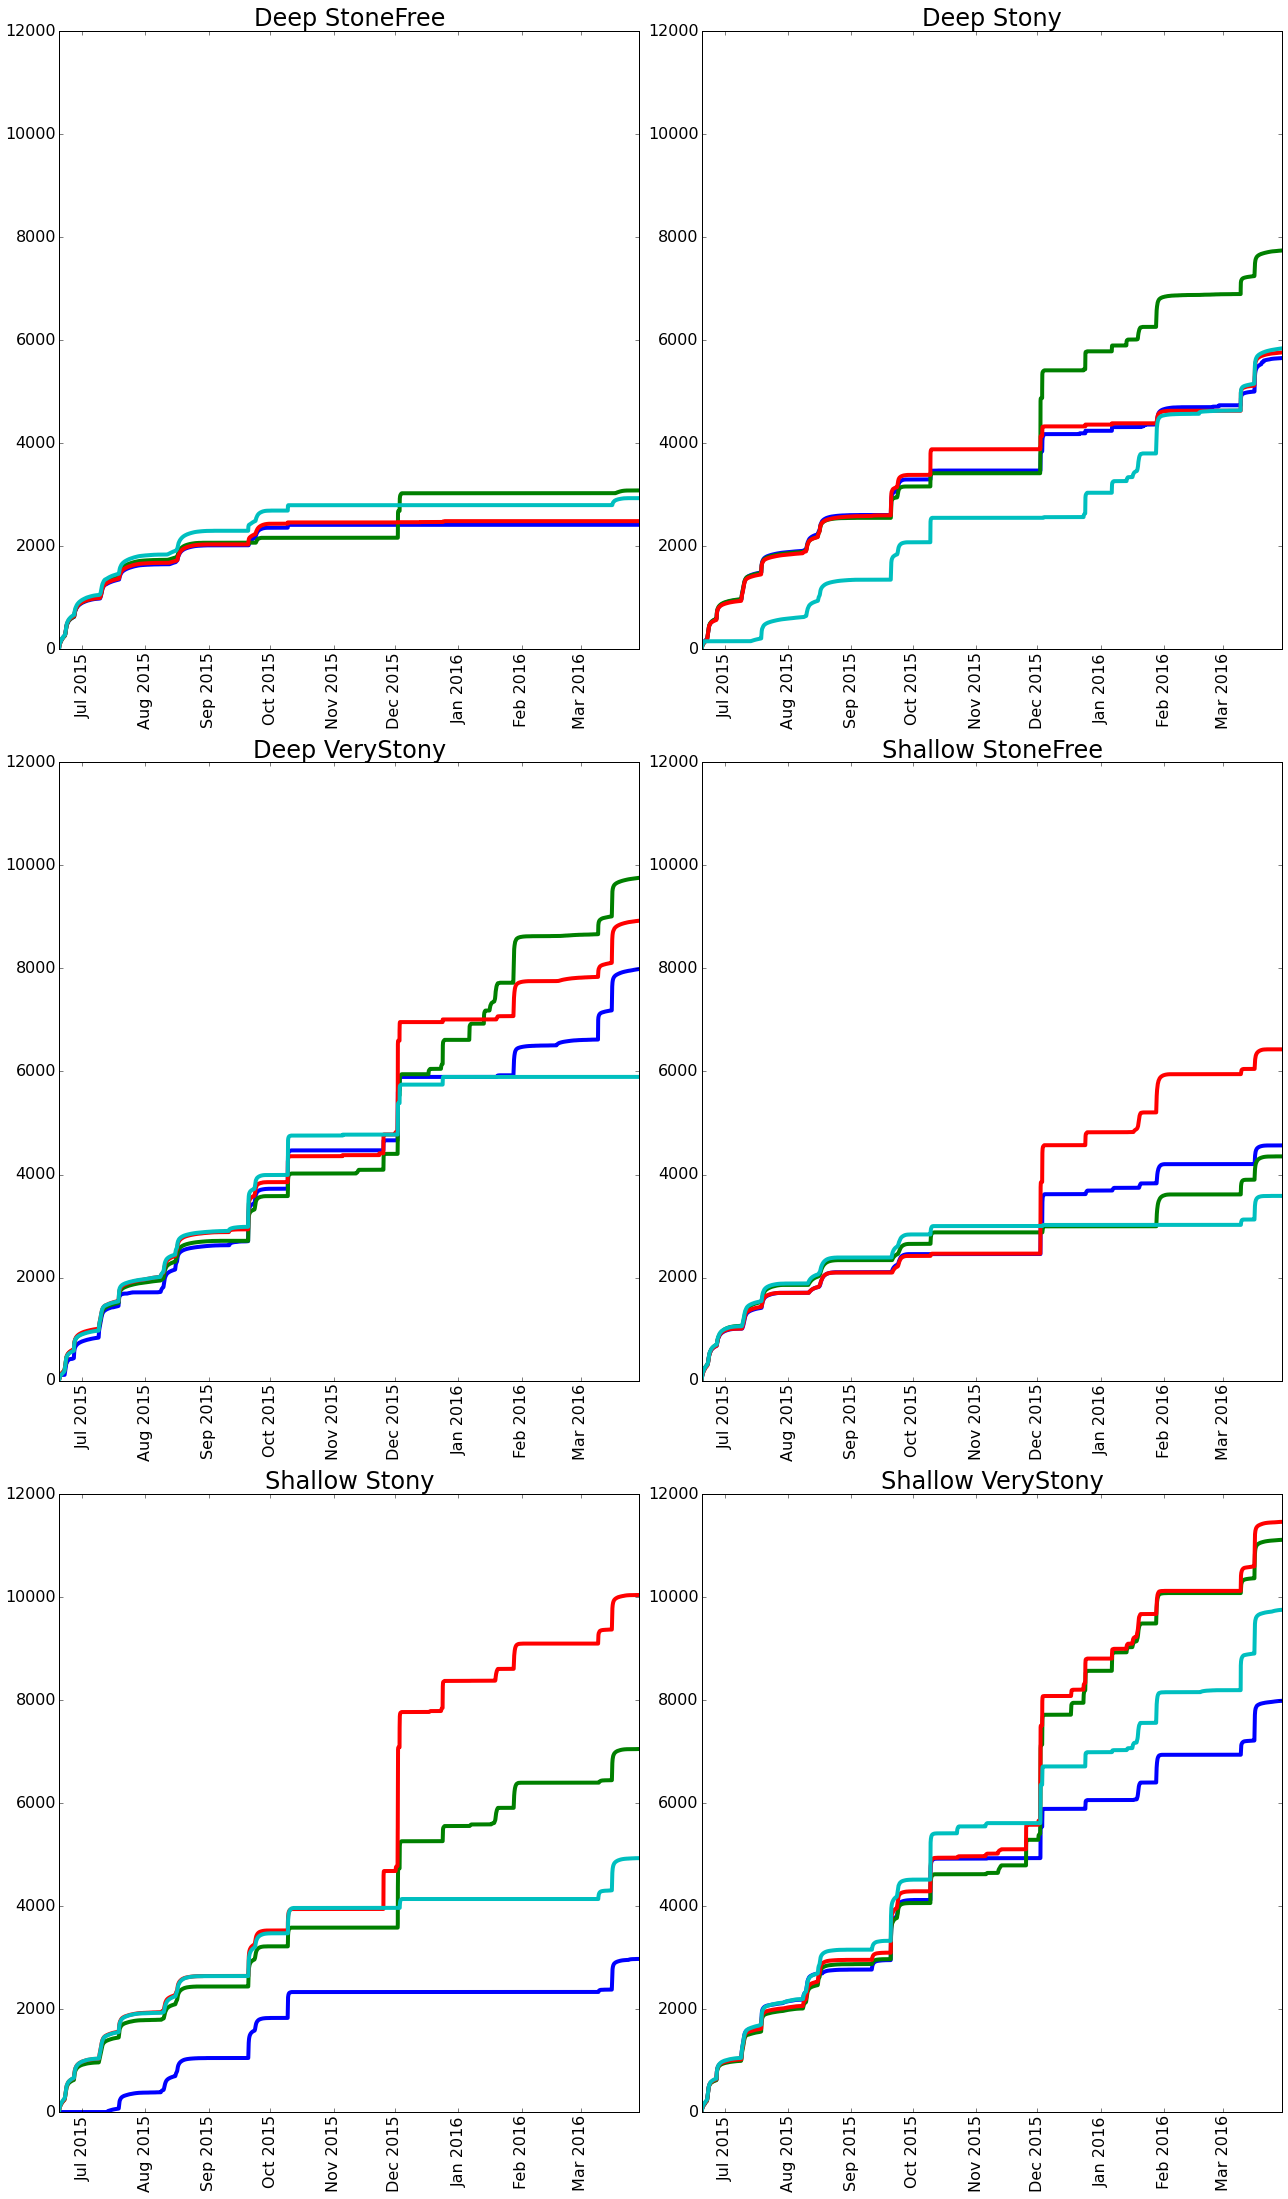

In [105]:
#AccumData = Data.cumsum()
#AccumData.ix[:,('Deep','StoneFree')]
Fig = plt.figure(figsize=(18, 60))

Fig.add_subplot(6,2,1)
plt.title('Deep StoneFree', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','StoneFree')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
plt.ylim(0,12000)
Fig.add_subplot(6,2,2)
plt.title('Deep Stony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','Stony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
plt.ylim(0,12000)
Fig.add_subplot(6,2,3)
plt.title('Deep VeryStony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','VeryStony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
plt.ylim(0,12000)
Fig.add_subplot(6,2,4)
plt.title('Shallow StoneFree', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','StoneFree')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
plt.ylim(0,12000)
Fig.add_subplot(6,2,5)
plt.title('Shallow Stony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','Stony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
plt.ylim(0,12000)
Fig.add_subplot(6,2,6)
plt.title('Shallow VeryStony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','VeryStony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.legend(loc=1, fontsize=13, ncol=2)
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
plt.ylim(0,12000)
Fig.tight_layout()

## Look at the treatment means over time

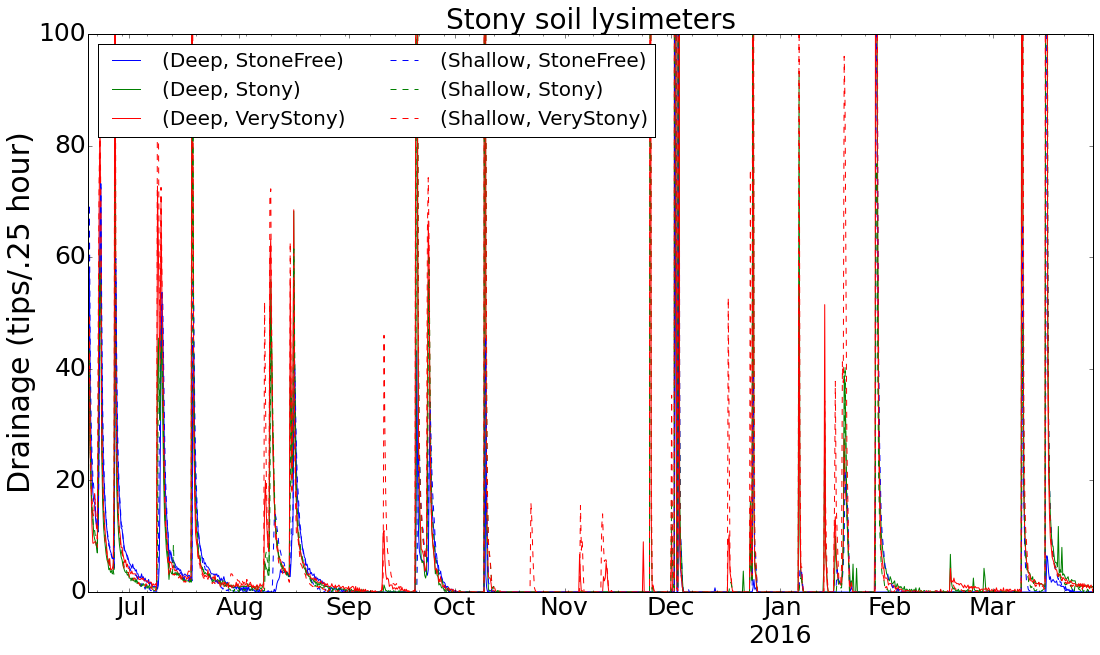

In [108]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
DataMeans =  Data.groupby(level=['Gravels','Stones'],axis=1).mean()
#DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function

AccumDrain = DataMeans.resample('6h', how='sum')#.cumsum()
                
AccumDrain['2015-04-26':].plot(figsize=(18,10),style=['b-','g-','r-','b--','g--','r--'],ylim=(0,100))
plt.ylabel('Drainage (tips/.25 hour)', fontsize=30);
plt.tick_params(labelsize=25)
plt.title('Stony soil lysimeters', fontsize=28)
plt.legend(fontsize = 20, loc=2, ncol=2)

In [100]:

##Graph treatment means by layer

In [101]:
#!gist -p -d "Setting up Soil summary for Export" SoilWaterAnalysis.ipynb

In [102]:
!gist -u https://gist.github.com/604c4dfd746733297790 SoilWaterAnalysis.ipynb

https://gist.github.com/604c4dfd746733297790


In [103]:
from plotly.graph_objs import *

DeepStoneFree = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','StoneFree')],
                        name = 'Deep StoneFree',
                        line = Line(color = 'blue', dash ='solid')
                       )

ShallowStoneFree = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','StoneFree')],
                           name = 'Shallow StoneFree',
                           line = Line(color = 'blue', dash ='dash')
                           )
DeepStony = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','Stony')],
                        name = 'Deep Stony',
                        line = Line(color = 'green', dash ='solid')
                       )

ShallowStony = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','Stony')],
                           name = 'Shallow Stony',
                           line = Line(color = 'green', dash ='dash')
                           )
DeepVeryStony = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','VeryStony')],
                        name = 'Deep VeryStony',
                        line = Line(color = 'red', dash ='solid')
                       )

ShallowVeryStony = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','VeryStony')],
                           name = 'Shallow VeryStony',
                           line = Line(color = 'red', dash ='dash')
                           )

data = Data([DeepStoneFree, ShallowStoneFree, DeepStony, ShallowStony, DeepVeryStony, ShallowVeryStony])

py.iplot(data, filename = 'basic-line')